In [431]:
import pandas as pd
import numpy as np
import math
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
# Import Dataset

data = pd.read_csv('product_sales.csv')
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [433]:
# Quick Overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [434]:
# Sum of Missing Values in each of the Columns

data.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

## Data Validation

In [435]:
# years_as_customer column is numeric and has no missing values

data = data[data['years_as_customer'] <= 41]
data['years_as_customer'].agg(['min', 'max'])

min     0
max    39
Name: years_as_customer, dtype: int64

In [436]:
# week column is numeric and has no null values

data['week'].info()

<class 'pandas.core.series.Series'>
Index: 14998 entries, 0 to 14999
Series name: week
Non-Null Count  Dtype
--------------  -----
14998 non-null  int64
dtypes: int64(1)
memory usage: 234.3 KB


In [437]:
# sales method column must have 3 categories, but here we 2 extra redundant ones

data['sales_method'].value_counts()

sales_method
Email           7455
Call            4961
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [438]:
data['sales_method'] = data['sales_method'].str.capitalize()
data['sales_method'] = data['sales_method'].str.replace('Em + call', 'Email + call')
data['sales_method'].value_counts()

sales_method
Email           7465
Call            4961
Email + call    2572
Name: count, dtype: int64

In [439]:
# customer id has no null values

data['customer_id'].info()

<class 'pandas.core.series.Series'>
Index: 14998 entries, 0 to 14999
Series name: customer_id
Non-Null Count  Dtype 
--------------  ----- 
14998 non-null  object
dtypes: object(1)
memory usage: 234.3+ KB


In [440]:
# nb_sold column is numeric and has no null values

data['nb_sold'].info()

<class 'pandas.core.series.Series'>
Index: 14998 entries, 0 to 14999
Series name: nb_sold
Non-Null Count  Dtype
--------------  -----
14998 non-null  int64
dtypes: int64(1)
memory usage: 234.3 KB


In [441]:
# revenue column has Nan values which may cause troubles during calculations, so we use '0' in their place

data['revenue'] = data['revenue'].fillna(0)
data['revenue'].info()

<class 'pandas.core.series.Series'>
Index: 14998 entries, 0 to 14999
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
14998 non-null  float64
dtypes: float64(1)
memory usage: 234.3 KB


In [442]:
# nb_site_visits column has no null and is numeric

data['nb_site_visits'].info()
data['nb_site_visits'].agg([min, max])

<class 'pandas.core.series.Series'>
Index: 14998 entries, 0 to 14999
Series name: nb_site_visits
Non-Null Count  Dtype
--------------  -----
14998 non-null  int64
dtypes: int64(1)
memory usage: 234.3 KB


C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\1606649204.py:4: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data['nb_site_visits'].agg([min, max])
C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\1606649204.py:4: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data['nb_site_visits'].agg([min, max])


min    12
max    41
Name: nb_site_visits, dtype: int64

In [443]:
# state column has unique values and a total of 50 US states, and no null values

print(data['state'].info())
print(data['state'].unique().shape)

<class 'pandas.core.series.Series'>
Index: 14998 entries, 0 to 14999
Series name: state
Non-Null Count  Dtype 
--------------  ----- 
14998 non-null  object
dtypes: object(1)
memory usage: 234.3+ KB
None
(50,)


## Inferences

C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\1068625460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(no_of_customers, palette = ['#390099', '#9e0059', '#ff0054'])


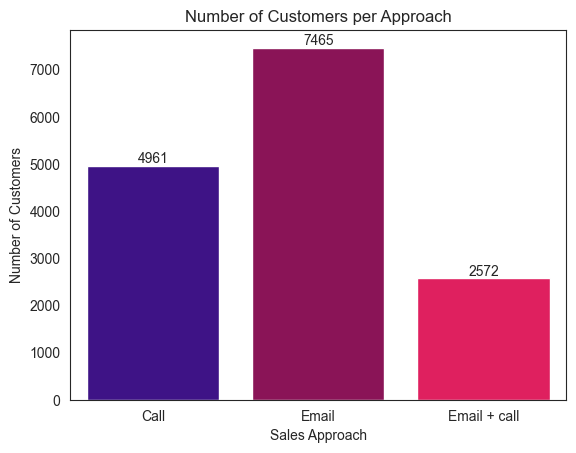

In [444]:
no_of_customers = data.groupby('sales_method')['customer_id'].nunique()

bar1 = sns.barplot(no_of_customers, palette = ['#390099', '#9e0059', '#ff0054'])
plt.title("Number of Customers per Approach")
plt.xlabel("Sales Approach")
plt.ylabel("Number of Customers")
for container in bar1.containers:
    bar1.bar_label(container)
plt.show()

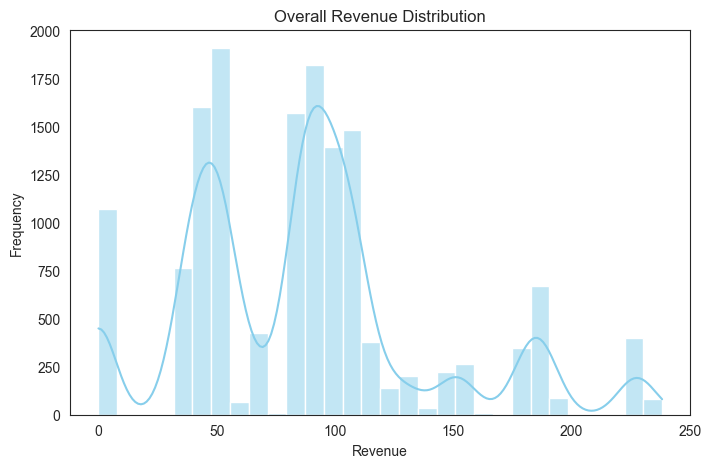

In [445]:
plt.figure(figsize=(8, 5))

sns.histplot(data['revenue'], kde=True, color='skyblue', bins=30)
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.show()

C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\4033757550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data, x='sales_method', y='revenue', palette=['#a4243b', '#d8c99b','#d8973c'])


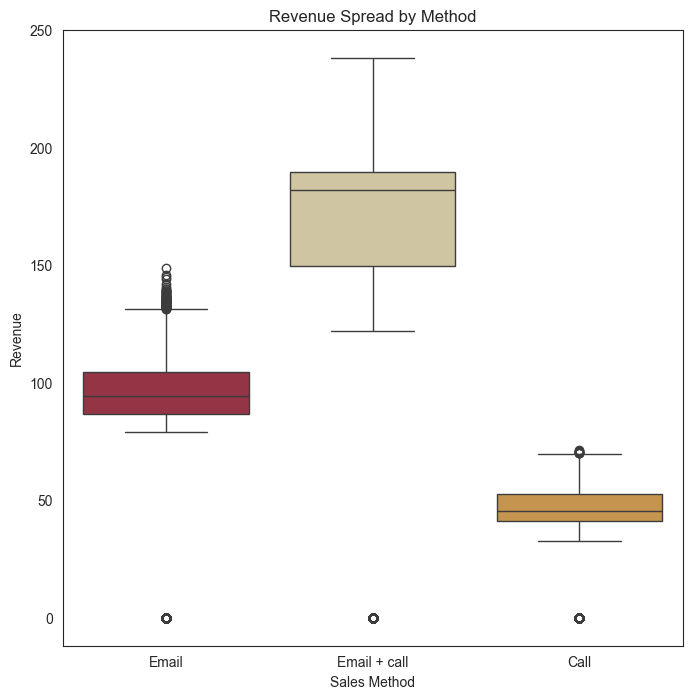

In [446]:
plt.figure(figsize=(8, 8))
sns.boxplot(data, x='sales_method', y='revenue', palette=['#a4243b', '#d8c99b','#d8973c'])
plt.title('Revenue Spread by Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\3186039932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(revenue_per_method, palette = 'bright')


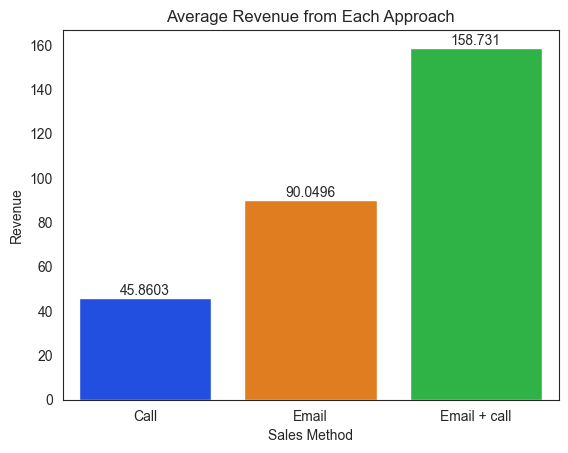

In [447]:
revenue_per_method = data.groupby('sales_method')['revenue'].mean()

bar2 = sns.barplot(revenue_per_method, palette = 'bright')
plt.title('Average Revenue from Each Approach')
plt.ylabel('Revenue')
plt.xlabel('Sales Method')

for container in bar2.containers:
    bar2.bar_label(container)

C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\1367376977.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data, x = 'week',


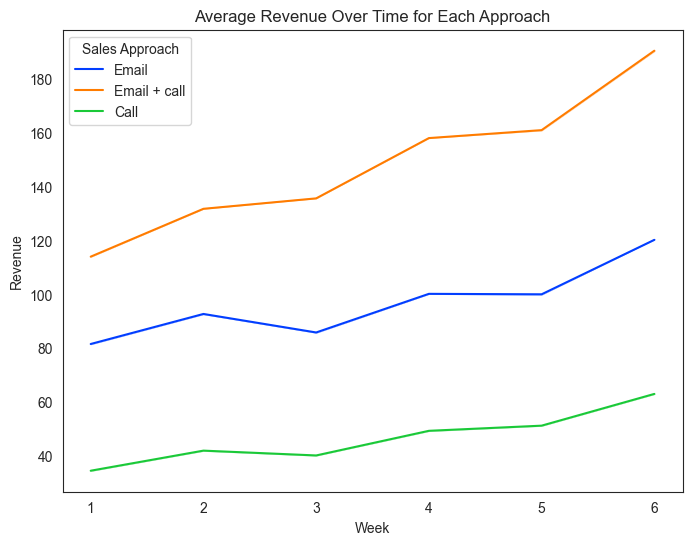

In [448]:
plt.figure(figsize = (8,6))

sns.lineplot(data, x = 'week',
            y = 'revenue',
            hue = 'sales_method',
            palette = 'bright',
            ci = False,
            estimator = 'mean')

plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Average Revenue Over Time for Each Approach')
plt.legend().set_title("Sales Approach")

Statistical Test to find out if Email + Call Method is significantly better than other methods:

H0: The Sales Methods have result in the same revenue distribution (no difference).
H1: At least one method differs in revenue distribution.

With Significance Level (alpha) as 5%

In [449]:
alpha = 0.05

In [450]:
# Kruskal Wallis because the Revenue is not normally distributed, as we can see from the box plot, there are a lot of outliers

from scipy.stats import kruskal

In [451]:
stat, p_val = kruskal(data[data['sales_method'] == 'Email']['revenue'],
                      data[data['sales_method'] == 'Call']['revenue'],
                      data[data['sales_method'] == 'Email + call']['revenue'])

if p_val >= alpha:
    print("Since the p-Value is more than the Significan Level, H0 fail to Reject")
elif p_val < alpha:
    print(f"Since p-Value ({p_val}) is less than Significance level, H0 is Rejected")
else:
    end

Since p-Value (0.0) is less than Significance level, H0 is Rejected


The above Kruskal Wallis test proves that one method (Email + call) is significantly superior to the rest of the methods.

C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\3854554085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  new_cust_bar = sns.barplot(new_cust, palette = ['#ffbe0b', '#fb5607', '#ff006e'])


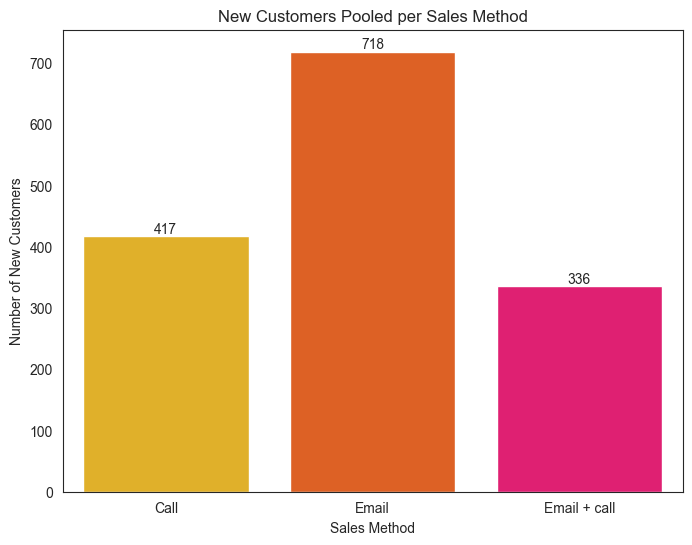

In [452]:
new_cust = data[data['years_as_customer'] == 0]
new_cust = new_cust.groupby('sales_method')['customer_id'].count()

sns.set_style("white")
plt.figure(figsize = (8, 6))
new_cust_bar = sns.barplot(new_cust, palette = ['#ffbe0b', '#fb5607', '#ff006e'])
plt.title("New Customers Pooled per Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of New Customers")
for container in new_cust_bar.containers:
    new_cust_bar.bar_label(container)

# sns.barplot(data = data, x = 'sales_method', y = 'years_as_customer', estimator = 'sum', ci = False)

<Axes: xlabel='sales_method', ylabel='nb_site_visits'>

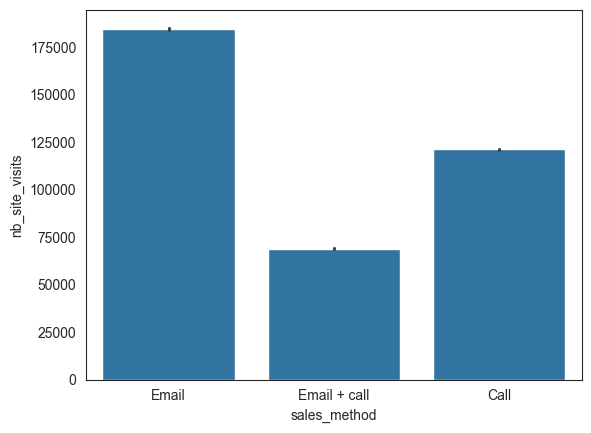

In [453]:
sns.barplot(data = data, x = 'sales_method', y = 'nb_site_visits', estimator = 'sum')

In [454]:
# CLV

customer_revenue = data.groupby('customer_id').agg({'revenue' : 'mean', 'years_as_customer': 'max'})
customer_revenue.sort_values('revenue', ascending= False).sort_values('years_as_customer', ascending=False)

,revenue,years_as_customer
customer_id,,
38a2040b-ab8d-4522-a453-07b3d1ff47af,101.41,39
ae6df2ea-c55a-4251-803f-3daaf49d3f94,85.49,39
ace324ea-fb31-4644-8ad6-12e41e76b1a8,0.00,39
673e5550-c258-4b9b-985b-eca9427a8d55,40.64,38
41de5549-3522-4345-9ec5-39c5834531dc,93.34,38
...,...,...
a6559e9b-aa6e-42ff-8941-7e8509aa5a8a,86.02,0
2ac07a1a-7bef-41b9-a09b-86c910f1c876,86.05,0
c1c73fb9-cf35-47e2-94d0-eec90bcada4d,233.80,0


In [455]:
bins = [0, 2, 4, 6, 8]
labels = ['0-2 weeks', '2-4 weeks', '4-6 weeks', '6+ weeks']

data['tenure'] = pd.cut(data['years_as_customer'], bins = bins, labels = labels, right = False)

C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\4286213046.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_tenure = data.groupby('tenure')['revenue'].mean().reset_index().sort_values(by = 'revenue', ascending = False)


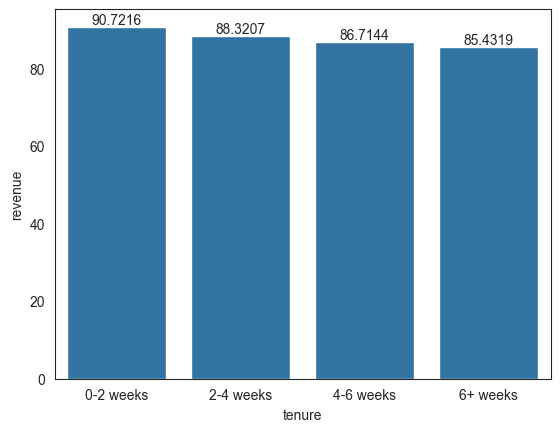

In [456]:
rev_tenure = data.groupby('tenure')['revenue'].mean().reset_index().sort_values(by = 'revenue', ascending = False)

revenue_plot = sns.barplot(data = rev_tenure, x = 'tenure', y = 'revenue')
for container in revenue_plot.containers:
    revenue_plot.bar_label(container)

In [457]:
# If your goal = maximize total revenue
# Total Revenue per Method = Number of Customers × Average Revenue per Customer

avg_rev_per_cust = data.groupby('sales_method')['revenue'].mean()
print(avg_rev_per_cust)

print((no_of_customers))


sales_method
Call             45.860314
Email            90.049646
Email + call    158.731217
Name: revenue, dtype: float64
sales_method
Call            4961
Email           7465
Email + call    2572
Name: customer_id, dtype: int64


In [458]:
call, email, emcall = no_of_customers * avg_rev_per_cust

print(f"Total revenue generated by Call Method is {call}")
print(f"Total revenue generated by Email Method is {email}")
print(f"Total revenue generated by Email and Call Method is {emcall}")

Total revenue generated by Call Method is 227513.02
Total revenue generated by Email Method is 672220.61
Total revenue generated by Email and Call Method is 408256.69


C:\Users\Saqib\AppData\Local\Temp\ipykernel_392\2406555260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = [call, email, emcall],


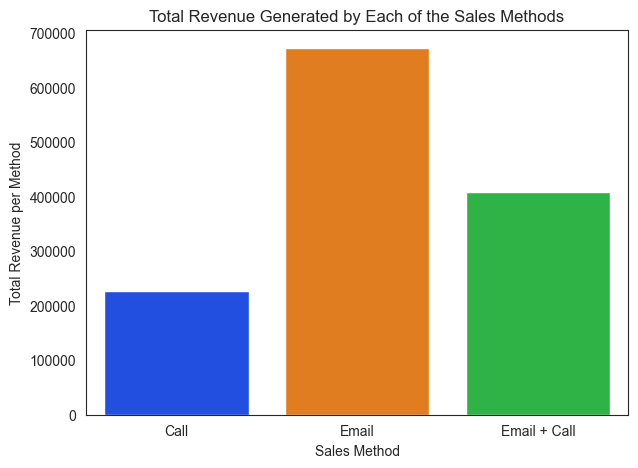

In [459]:
plt.figure(figsize = (7, 5))

sns.barplot(y = [call, email, emcall],
            x = ['Call', 'Email', 'Email + Call'],
            palette = 'bright')
plt.xlabel("Sales Method")
plt.ylabel("Total Revenue per Method")
plt.title("Total Revenue Generated by Each of the Sales Methods")
plt.show()

In [460]:
weekly_metrics = (data.groupby(['week', 'sales_method']).agg(no_of_customers = ('customer_id', 'nunique'),
                                                              avg_revenue=('revenue', 'mean')).reset_index())

weekly_metrics['total_revenue'] = (
    weekly_metrics['no_of_customers'] * weekly_metrics['avg_revenue']
)

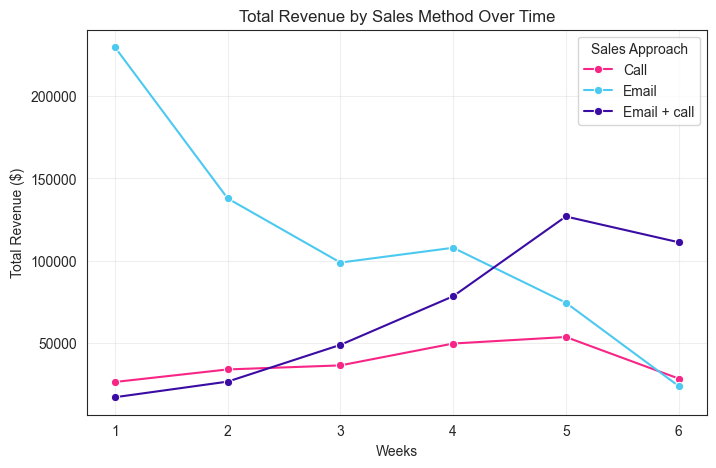

In [461]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data = weekly_metrics,
    x = 'week',
    y = 'total_revenue',
    hue = 'sales_method',
    marker = 'o',
    palette = ['#f72585', '#4cc9f0', '#3a0ca3']
)

plt.title('Total Revenue by Sales Method Over Time')
plt.xlabel('Weeks')
plt.ylabel('Total Revenue ($)')
plt.grid(alpha=0.3)
plt.legend().set_title("Sales Approach")
plt.show()

In [462]:
conv_efficiency = (data.groupby(['week', 'sales_method']).agg({'nb_sold': 'sum', 'nb_site_visits': 'sum'}))
conv_efficiency['efficiency'] = (conv_efficiency['nb_sold'] / conv_efficiency['nb_site_visits']) * 100

conv_efficiency

nb_sold  nb_site_visits  efficiency
week sales_method                                     
1    Call             5366           16290   32.940454
     Email           24573           66330   37.046585
     Email + call     1281            3475   36.863309
2    Call             7088           19198   36.920513
     Email           14942           37374   39.979665
     Email + call     2016            4999   40.328066
3    Call             7456           20682   36.050672
     Email           10678           27993   38.145251
     Email + call     3594            8869   40.523171
4    Call            10249           25569   40.083695
     Email           11736           28084   41.788919
     Email + call     5960           13220   45.083207
5    Call            11129           27012   41.200207
     Email            8117           19517   41.589384
     Email + call     9817           21489   45.683838
6    Call             5889           12413   47.442198
     Email            2583            5494   47.014925
     Email + call     8776           16804   52.225661

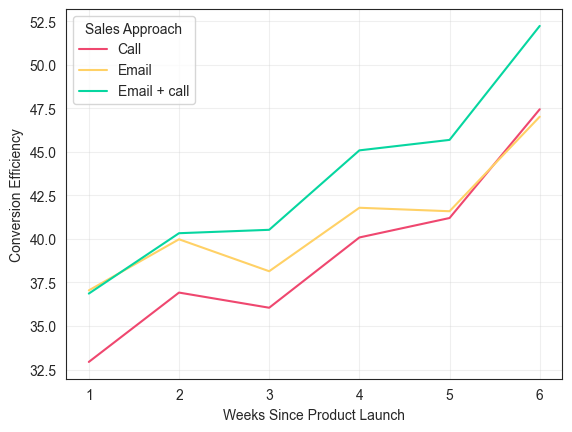

In [463]:
eff_plot = sns.lineplot(conv_efficiency, x = 'week', y = 'efficiency', hue = 'sales_method', palette= ['#ef476f', '#ffd166', '#06d6a0'])
plt.grid(alpha=0.3)
plt.legend().set_title("Sales Approach")
plt.xlabel("Weeks Since Product Launch")
plt.ylabel('Conversion Efficiency')
plt.show()

<Axes: xlabel='sales_method'>

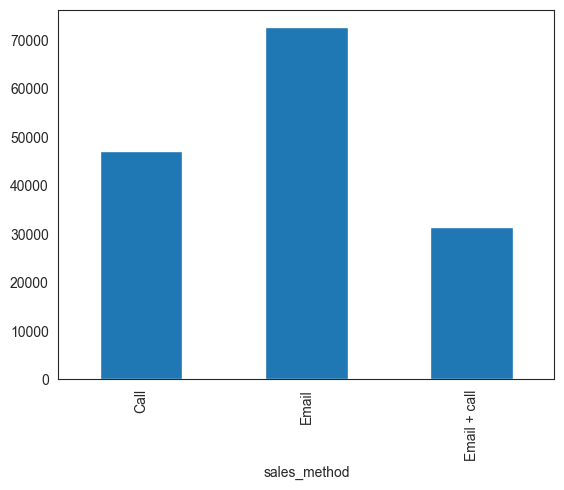

In [464]:
prod_sold = data.groupby('sales_method')['nb_sold'].sum()

prod_sold.plot(kind = 'bar')